## Data Cleaning and EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as py


# Read in bus transit data
bus_ridership = pd.read_csv('./data/CTA_Ridership_2012_2019.csv')
weather = pd.read_csv('./data/Chi_Weather_2012_2019.csv')

### Merge weather, holidays, and bus ridership datasets

In [ ]:
# rename date column to match ridership dataset
weather.rename(columns={'DATE':'date'}, inplace = True)

In [ ]:
print(bus_ridership.head())
print(weather.head())

  route        date daytype  rides
0     3  2012-01-01       U   7661
1     4  2012-01-01       U   9259
2     5  2012-01-01       U    687
3     6  2012-01-01       U   5866
4     8  2012-01-01       U   6963
         date   DAPR     MDPR      PRCP      SNOW      SNWD   TAVG  TMAX  \
0  2012-01-01  3.500  0.21500  0.025275  0.000000  0.000000  36.30  44.6   
1  2012-01-02  2.000  0.02000  0.016667  0.137838  0.125000  26.20  33.4   
2  2012-01-03  3.625  0.09625  0.003448  0.027500  0.025532  19.25  26.3   
3  2012-01-04  6.000  0.41000  0.000000  0.000000  0.000000  28.40  36.8   
4  2012-01-05  9.000  0.41500  0.000000  0.000000  0.000000  36.45  47.0   

   TMIN       TOBS  ...  glaze  smoke  blowing_snow  tornado  high_wind  mist  \
0  28.0  34.142857  ...    NaN    1.0           NaN      NaN        NaN   NaN   
1  19.0  19.857143  ...    NaN    NaN           NaN      NaN        NaN   NaN   
2  12.2  18.428571  ...    NaN    NaN           NaN      NaN        NaN   NaN   
3  20.0  

In [ ]:
# merge bus dataset and weather dataset on date column
bus_weather = bus_ridership.merge(weather, on='date', how='left')

print(bus_weather.head())

  route        date daytype  rides  DAPR   MDPR      PRCP  SNOW  SNWD  TAVG  \
0     3  2012-01-01       U   7661   3.5  0.215  0.025275   0.0   0.0  36.3   
1     4  2012-01-01       U   9259   3.5  0.215  0.025275   0.0   0.0  36.3   
2     5  2012-01-01       U    687   3.5  0.215  0.025275   0.0   0.0  36.3   
3     6  2012-01-01       U   5866   3.5  0.215  0.025275   0.0   0.0  36.3   
4     8  2012-01-01       U   6963   3.5  0.215  0.025275   0.0   0.0  36.3   

   ...  glaze  smoke  blowing_snow  tornado  high_wind  mist  drizzle  rain  \
0  ...    NaN    1.0           NaN      NaN        NaN   NaN      NaN   1.0   
1  ...    NaN    1.0           NaN      NaN        NaN   NaN      NaN   1.0   
2  ...    NaN    1.0           NaN      NaN        NaN   NaN      NaN   1.0   
3  ...    NaN    1.0           NaN      NaN        NaN   NaN      NaN   1.0   
4  ...    NaN    1.0           NaN      NaN        NaN   NaN      NaN   1.0   

   snow  PRCP_unknown_source  
0   1.0            

In [ ]:
# Save to csv file
bus_weather.to_csv('bus_weather_2012_2019.csv', header=True, index=False)

In [ ]:
holidays = pd.read_csv('./data/holidays_2012_2019.csv')
print(holidays.head())

         Date      Holiday    WeekDay
0  2015-07-04  4th of July   Saturday
1  2016-07-04  4th of July     Monday
2  2017-07-04  4th of July    Tuesday
3  2018-07-04  4th of July  Wednesday
4  2019-07-04  4th of July   Thursday


In [ ]:
# rename holidays dataset data column to match
holidays.rename(columns={'Date':'date'}, inplace = True)

In [ ]:
# merge holidays dataset with bus_weather dataset
bus_weather_holidays = bus_weather.merge(holidays, on='date', how='left')

In [ ]:
(bus_weather_holidays.head())

,route,date,daytype,rides,DAPR,MDPR,PRCP,SNOW,SNWD,TAVG,...,blowing_snow,tornado,high_wind,mist,drizzle,rain,snow,PRCP_unknown_source,Holiday,WeekDay
0,3,2012-01-01,U,7661,3.5,0.215,0.025275,0.0,0.0,36.3,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
1,4,2012-01-01,U,9259,3.5,0.215,0.025275,0.0,0.0,36.3,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
2,5,2012-01-01,U,687,3.5,0.215,0.025275,0.0,0.0,36.3,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
3,6,2012-01-01,U,5866,3.5,0.215,0.025275,0.0,0.0,36.3,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
4,8,2012-01-01,U,6963,3.5,0.215,0.025275,0.0,0.0,36.3,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN


In [ ]:
bus_weather_holidays.to_csv('bus_weather_holidays_2012_2019.csv', header=True, index=False)

### Descriptive statistics and plots of bus ridership data

In [ ]:
bus_ridership_all = pd.read_csv('./data/bus_weather_holidays_2012_2019.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
bus_ridership_all['route'].nunique()


159

In [ ]:
bus_ridership_all['year']=pd.DatetimeIndex(bus_ridership_all['date']).year

In [ ]:
bus_ridership_all['daytype'].unique()


(341155, 29)

In [ ]:
bus_ridership_all.shape

(341155, 29)

In [ ]:
bus_ridership_all.isna().sum()

route                       0
date                        0
daytype                     0
rides                       0
DAPR                    79895
MDPR                    80586
PRCP                        0
SNOW                        0
SNWD                        0
TAVG                        0
TMAX                        0
TMIN                        0
TOBS                        0
fog                    168737
heavy_fog              326109
thunder                265449
sleet                  330509
hail                   333929
glaze                  327854
smoke                  239781
blowing_snow           337524
tornado                341027
high_wind              333036
mist                   325986
drizzle                337209
rain                   323702
snow                   331263
PRCP_unknown_source    341059
year                        0
dtype: int64

In [ ]:
bus_ridership_all.describe()

,rides,DAPR,MDPR,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TOBS,...,smoke,blowing_snow,tornado,high_wind,mist,drizzle,rain,snow,PRCP_unknown_source,year
count,341155.000000,261260.000000,260569.000000,341155.000000,341155.000000,341155.000000,341155.000000,341155.000000,341155.000000,341155.000000,...,101374.0,3631.0,128.0,8119.0,15169.0,3946.0,17453.0,9892.0,96.0,341155.000000
mean,6268.030285,5.139569,0.574057,0.118757,0.096561,0.575708,51.156889,59.999345,42.195672,47.494402,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2015.465179
std,6037.673534,4.902062,0.842573,0.274715,0.535912,1.936472,20.106425,20.988124,19.220857,18.857221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.299453
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,-2.500000,-21.600000,-18.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2012.000000
25%,1536.000000,2.714286,0.050000,0.000094,0.000000,0.000000,35.900000,42.700000,28.200000,33.142857,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2013.000000
50%,4128.000000,4.000000,0.301667,0.006742,0.000000,0.000000,52.000000,61.700000,42.400000,47.857143,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2015.000000
75%,9560.000000,6.000000,0.775000,0.091196,0.000000,0.000000,69.000000,78.800000,59.100000,64.428571,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2017.000000
max,36745.000000,88.000000,11.280000,3.761504,11.125352,16.113115,90.888889,102.111111,79.666667,83.666667,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2019.000000


In [ ]:
#get the tuples where rides is 0 
zero_rides=bus_ridership_all[bus_ridership_all['rides']==0]
print(zero_rides)

#get the tuple where rides is 0 on week day(W)
print(zero_rides[zero_rides['daytype']=='W'])

       route        date daytype  rides   DAPR    MDPR      PRCP      SNOW  \
27494    X98  2012-08-11       A      0   3.00  0.5700  0.029000  0.000000   
143279  1001  2015-04-05       U      0  16.00  0.2050  0.000000  0.000000   
165933   125  2015-11-26       U      0    NaN     NaN  0.214419  0.000000   
166033     1  2015-11-21       A      0   2.00  0.2500  0.442805  3.010000   
167046     1  2015-11-07       A      0   6.00  0.9050  0.000215  0.000000   
167520     1  2015-11-28       A      0   3.25  1.3325  0.085294  0.000000   
168275     1  2015-11-26       U      0    NaN     NaN  0.214419  0.000000   
187076  1001  2016-05-13       W      0   4.00  2.9900  0.054466  0.000000   
206510   157  2016-10-23       U      0   3.00  0.1100  0.000000  0.000000   
256033    19  2017-12-31       U      0   3.00  0.1100  0.000753  0.008861   

            SNWD       TAVG  ...  smoke  blowing_snow  tornado  high_wind  \
27494   0.000000  66.666667  ...    NaN           NaN      NaN  

In [ ]:
mean_ridership_route_daytype_complete= bus_ridership_all.groupby(['daytype','route'])['rides'].mean().sort_values(ascending = False)
print(mean_ridership_route_daytype_complete)


daytype  route
W        79       25940.714076
         66       23602.631682
         9        23265.152526
         8        21613.548308
         77       21366.462482
                      ...     
U        7            1.000000
         992          1.000000
A        26           1.000000
U        125          0.000000
         157          0.000000
Name: rides, Length: 395, dtype: float64


<AxesSubplot:title={'center':'Ridership on routes'}, xlabel='route'>

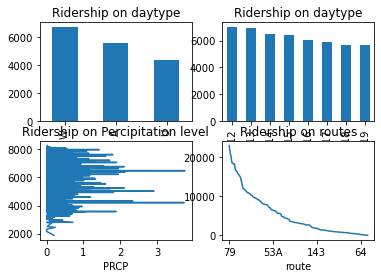

In [ ]:
mean_ridership_daytype = bus_ridership_all.groupby(['daytype'])['rides'].mean().sort_values(ascending = False)
mean_ridership_year = bus_ridership_all.groupby(pd.DatetimeIndex(bus_ridership_all['date']).year)['rides'].mean().sort_values(ascending = False)
mean_ridership_prcp = bus_ridership_all.groupby(['PRCP'])['rides'].mean().sort_values(ascending = False)
mean_ridership_route = bus_ridership_all.groupby(['route'])['rides'].mean().sort_values(ascending = False)

fig, axes=plt.subplots(nrows=2,ncols=2)

mean_ridership_daytype.plot(ax=axes[0][0],x = 'daytype', y = 'rides', kind='bar',title = 'Ridership on daytype')
mean_ridership_year.plot(ax=axes[0][1],x = 'year', y = 'rides', kind='bar',title = 'Ridership on daytype')
mean_ridership_prcp.plot(ax=axes[1][0],y = 'rides',x = 'PRCP',title = 'Ridership on Percipitation level')
mean_ridership_route.plot(ax=axes[1][1],x = 'route',y='rides',title = 'Ridership on routes')

Take away: There are more rideship on daytypre W than U and A. 
2. There were more riders 2012 than 2019.
3. When percipitation is low, riders are more.
4. Route 79 is businest route while 64 is least busy.

Checking  data count for years, daytype amd route.


C:\Users\aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


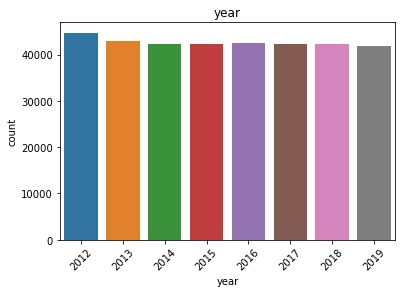

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


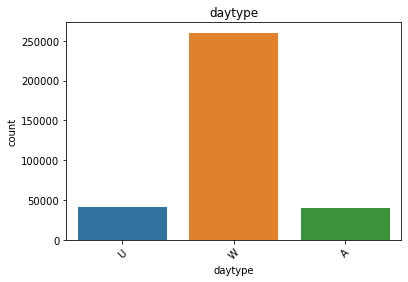

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


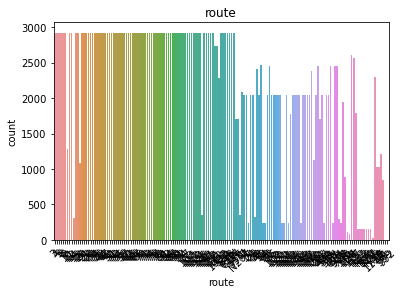

In [ ]:

for col in ['year','daytype','route']:
    sns.countplot(bus_ridership_all[col])
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
Take away: 
    1. We have data for each year with approximately equal amount.
    2. We have data count fffffor daytype W far more than U and A.

<AxesSubplot:title={'center':'Ridership monthwise each year(2012-2019)'}, xlabel='Month', ylabel='Rides'>

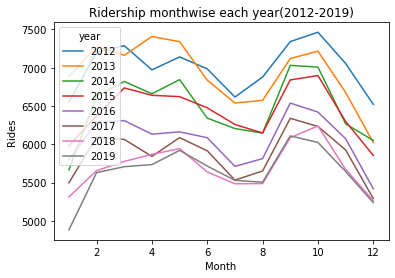

In [ ]:
pivot_month_year_ridership=pd.pivot_table(bus_ridership_all,index=pd.DatetimeIndex(bus_ridership_all['date']).month,columns='year',values='rides',aggfunc=py.mean) 
pivot_month_year_ridership.plot(xlabel="Month",ylabel="Rides",title="Ridership monthwise each year(2012-2019)")

<AxesSubplot:title={'center':'Ridership on daytype'}, xlabel='date'>

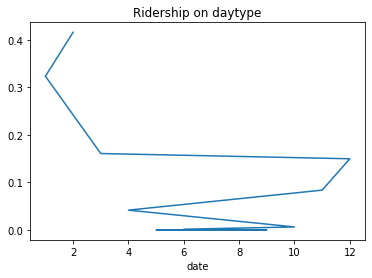

In [ ]:
mean_prcp_month= bus_ridership_all.groupby([pd.DatetimeIndex(bus_ridership_all['date']).month])['SNOW'].mean().sort_values(ascending = False)
mean_prcp_month.plot(x=pd.DatetimeIndex(bus_ridership_all['date']).month, y = 'SNOW',title = 'Monthly snow')


<AxesSubplot:title={'center':'Ridership monthwise each year(2012-2019)'}, xlabel='PRCP', ylabel='Rides'>

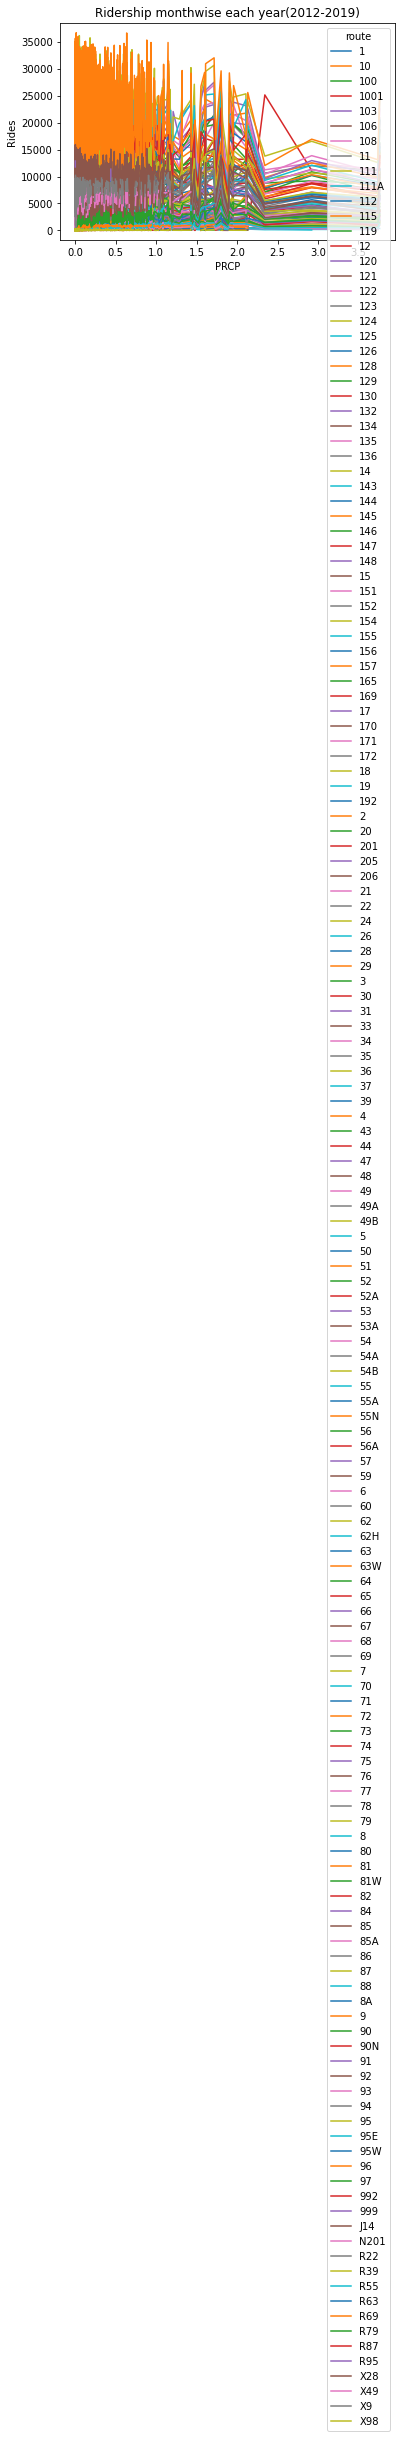

In [ ]:
route_set=bus_ridership_all['route'].unique

    
pivot_prcp_route_ridership=pd.pivot_table(bus_ridership_all,index='PRCP',columns='route',values='rides',aggfunc=py.mean) 
pivot_prcp_route_ridership.plot(xlabel="PRCP",ylabel="Rides",title="Ridership monthwise each year(2012-2019)")

In [ ]:
print(bus_ridership_all.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341241 entries, 0 to 341240
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   route                341241 non-null  object 
 1   date                 341241 non-null  object 
 2   daytype              341241 non-null  object 
 3   rides                341241 non-null  int64  
 4   DAPR                 261346 non-null  float64
 5   MDPR                 260655 non-null  float64
 6   PRCP                 341241 non-null  float64
 7   SNOW                 341241 non-null  float64
 8   SNWD                 341241 non-null  float64
 9   TAVG                 341241 non-null  float64
 10  TMAX                 341241 non-null  float64
 11  TMIN                 341241 non-null  float64
 12  TOBS                 341241 non-null  float64
 13  fog                  172504 non-null  float64
 14  heavy_fog            15046 non-null   float64
 15  thunder          

### Clean weather and holiday data and produce a workable dataset

In [ ]:
cleanweather = weather.drop(['DAPR','MDPR','TOBS','fog', 'heavy_fog', 'thunder', 'sleet', 
                             'hail', 'glaze', 'smoke', 'blowing_snow', 
                             'tornado', 'high_wind', 'mist', 'drizzle', 
                             'rain', 'snow', 'PRCP_unknown_source'], axis=1)

NameError: ignored

In [ ]:
print(cleanweather.info())

In [ ]:
clean_data = bus_ridership.merge(cleanweather, on='date', how='left')

In [ ]:
clean_data = clean_data.merge(holidays, on='date', how='left')

In [ ]:
print(clean_data.info())
print(clean_data)

In [ ]:
clean_data = clean_data.drop(['WeekDay'], axis=1)

In [ ]:
clean_data = clean_data.fillna({'Holiday':0})

In [ ]:
print(clean_data)

In [ ]:
clean_data['Holiday'].unique()

In [ ]:
clean_data = clean_data.replace(to_replace = ["New Year's Day", "Martin Luther King, Jr. Day",
                           "Valentine’s Day", "Washington's Birthday",
                           "Western Easter", "Memorial Day", "Eastern Easter",
                           "Juneteenth", '4th of July','Columbus Day', 'Labor Day',
                           'Labor Day Weekend', 'Thanksgiving Day', 'Veterans Day',
                           'Thanksgiving Eve', 'Christmas Day', 'Christmas Eve',
                           'New Year’s Eve'], value = 1.0)

In [ ]:
print(clean_data['Holiday'].unique())
print(clean_data['Holiday'].describe())

In [ ]:
print(clean_data)
print(clean_data.info())

In [ ]:
clean_data['date'] = pd.to_datetime(clean_data['date'])

In [ ]:
print(clean_data.info())

In [ ]:
# Replace categorical variables of weekday (W), saturday (A), or sunday (U) with 1.0 for weekday and 0.0 for weekend
clean_data['daytype'].unique()

In [ ]:
clean_data = clean_data.replace(to_replace = ['U', 'A'], value = 0.0)
clean_data = clean_data.replace(to_replace = ['W'], value = 1.0)

In [ ]:
clean_data.head()

In [ ]:
clean_data.to_csv('clean_bus_project_data_2012_2019.csv', header=True, index=False)

### Replace Route column with dummy variable

In [59]:
bus_ridership_all = pd.read_csv('./data/bus_weather1_2012_2019.csv')

In [61]:
bus_ridership_all = bus_ridership_all.replace(to_replace = ['U','A'], value = 0)

bus_ridership_all = bus_ridership_all.replace(to_replace = ['W'], value = 1)

In [62]:
bus_ridership_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341241 entries, 0 to 341240
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   route    341241 non-null  object 
 1   date     341241 non-null  object 
 2   daytype  341241 non-null  int64  
 3   rides    341241 non-null  int64  
 4   PRCP     341241 non-null  float64
 5   SNOW     341241 non-null  float64
 6   SNWD     341241 non-null  float64
 7   TAVG     341241 non-null  float64
 8   TMAX     341241 non-null  float64
 9   TMIN     341241 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 26.0+ MB


In [63]:
bus_ridership_all['year']=pd.DatetimeIndex(bus_ridership_all['date']).year
bus_ridership_all['month']=pd.DatetimeIndex(bus_ridership_all['date']).month
bus_ridership_all=bus_ridership_all.drop('date',axis=1)

In [67]:
month_rides=bus_ridership_all.loc[(bus_ridership_all['year']== 2018) | (bus_ridership_all['year']==2019)]

In [68]:
month_rides['route'].nunique()

131

In [69]:
month_rides['year'].unique

<bound method Series.unique of 257170    2018
257171    2018
257172    2018
257173    2018
257174    2018
          ... 
341236    2019
341237    2019
341238    2019
341239    2019
341240    2019
Name: year, Length: 84071, dtype: int64>

In [70]:
route_dummies=pd.get_dummies(month_rides['route'])
month_rides_with_dummy=pd.concat([route_dummies,month_rides.drop('route',axis=1)],axis='columns')

In [71]:
month_rides.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84071 entries, 257170 to 341240
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   route    84071 non-null  object 
 1   daytype  84071 non-null  int64  
 2   rides    84071 non-null  int64  
 3   PRCP     84071 non-null  float64
 4   SNOW     84071 non-null  float64
 5   SNWD     84071 non-null  float64
 6   TAVG     84071 non-null  float64
 7   TMAX     84071 non-null  float64
 8   TMIN     84071 non-null  float64
 9   year     84071 non-null  int64  
 10  month    84071 non-null  int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 7.7+ MB


In [72]:
month_rides.shape

(84071, 11)

In [73]:
month_rides.head()

,route,daytype,rides,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,year,month
257170,53,0,6793,0.002151,0.013889,2.706522,17.0,26.500000,2.3,2018,1
257171,111A,1,150,0.000000,0.000000,0.000000,35.0,38.800000,23.6,2018,1
257172,94,1,5573,0.000000,0.001266,2.788372,5.0,12.111111,-3.3,2018,1
257173,8,0,8116,0.334043,3.534568,13.872727,20.0,23.500000,12.9,2018,2
257174,155,0,4067,0.100333,1.367568,4.015556,27.0,39.100000,16.2,2018,2


In [74]:
month_rides.to_csv('month_rides_preprocessed.csv', header=True, index=False)
month_rides_with_dummy.to_csv('month_rides_with_dummy_preprocessed.csv', header=True, index=False)

adding season 

In [ ]:
seasons=[1,1,2,2,2,3,3,3,4,4,4,1]
month_to_season=dict(zip(range(1,13),seasons))
month_rides['season']=month_rides['month'].map(month_to_season)

### EDA on new dataset

In [75]:
mean_ridership_route_daytype_complete= month_rides.groupby(['daytype','route'])['rides'].mean().sort_values(ascending = False)
print(mean_ridership_route_daytype_complete)

daytype  route
1        79       23155.462745
         66       21561.015686
         8        20504.284314
         4        19160.274510
         77       19005.543137
                      ...     
         169        112.633858
0        169         11.984848
1        X98         10.448124
0        X98          5.000000
1        999          1.000000
Name: rides, Length: 230, dtype: float64


<AxesSubplot:title={'center':'Ridership during maximum temperature'}, xlabel='TMAX'>

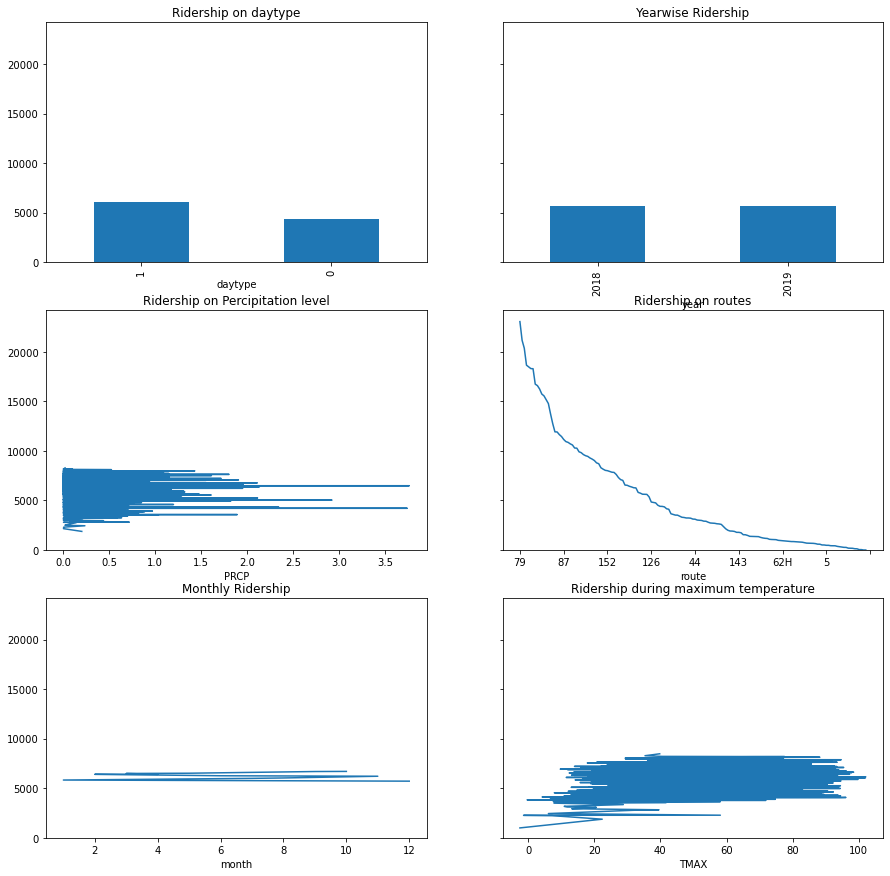

In [76]:
mean_ridership_daytype = month_rides.groupby(['daytype'])['rides'].mean().sort_values(ascending = False)
mean_ridership_year = month_rides.groupby(['year'])['rides'].mean().sort_values(ascending = False)
mean_ridership_prcp = bus_ridership_all.groupby(['PRCP'])['rides'].mean().sort_values(ascending = False)
mean_ridership_route = bus_ridership_all.groupby(['route'])['rides'].mean().sort_values(ascending = False)
mean_ridership_month = bus_ridership_all.groupby(['month'])['rides'].mean().sort_values(ascending = False)
mean_ridership_tmax = bus_ridership_all.groupby(['TMAX'])['rides'].mean().sort_values(ascending = False)
fig, axes=plt.subplots(nrows=3,ncols=2,figsize=(15,15),sharey=True)

mean_ridership_daytype.plot(ax=axes[0][0],x = 'daytype', y = 'rides', kind='bar',title = 'Ridership on daytype')
mean_ridership_year.plot(ax=axes[0][1],x = 'year', y = 'rides', kind='bar',title = 'Yearwise Ridership')
mean_ridership_prcp.plot(ax=axes[1][0],y = 'rides',x = 'PRCP',title = 'Ridership on Percipitation level')
mean_ridership_route.plot(ax=axes[1][1],x = 'route',y='rides',title = 'Ridership on routes')
mean_ridership_month.plot(ax=axes[2][0],x = 'month',y='rides',title = 'Monthly Ridership')
mean_ridership_tmax.plot(ax=axes[2][1],x = 'Maximum Temperature',y='rides',title = 'Ridership during maximum temperature')

In [77]:
month_rides.describe()

,daytype,rides,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,year,month
count,84071.000000,84071.000000,84071.000000,84071.000000,84071.000000,84071.000000,84071.000000,84071.000000,84071.000000,84071.000000
mean,0.762213,5669.403611,0.136059,0.104555,0.469842,50.467545,59.127495,41.715304,2018.497318,6.512674
std,0.425731,5248.963205,0.291501,0.479995,1.623156,20.577010,21.355624,19.702179,0.499996,3.441482
min,0.000000,1.000000,0.000000,0.000000,0.000000,-15.000000,-2.500000,-21.600000,2018.000000,1.000000
25%,1.000000,1424.000000,0.000196,0.000000,0.000000,34.000000,41.222222,27.300000,2018.000000,4.000000
50%,1.000000,3890.000000,0.009917,0.000000,0.000000,49.000000,57.900000,39.700000,2018.000000,7.000000
75%,1.000000,8862.000000,0.117363,0.000000,0.000000,70.000000,79.200000,60.125000,2019.000000,10.000000
max,1.000000,27676.000000,2.921382,5.427632,13.872727,87.000000,96.111111,77.444444,2019.000000,12.000000


C:\Users\aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


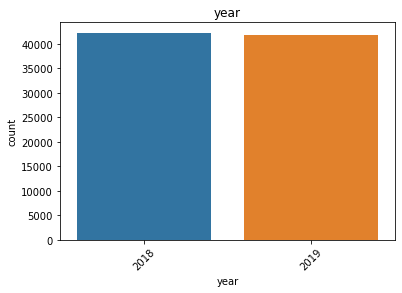

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


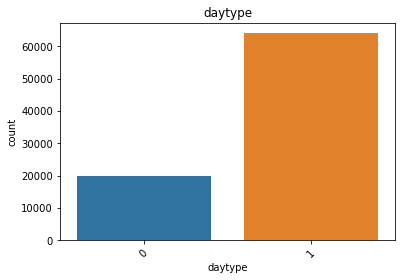

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


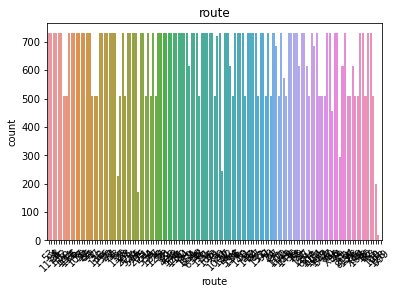

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


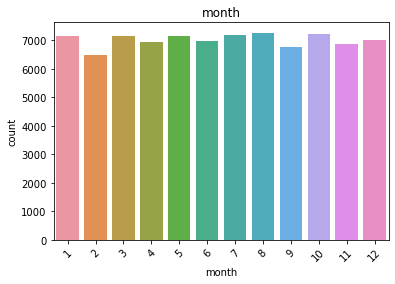

In [79]:
for col in ['year','daytype','route','month']:
    sns.countplot(month_rides[col])
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()


<AxesSubplot:title={'center':'Ridership monthwise each year(2018-2019)'}, xlabel='Month', ylabel='Rides'>

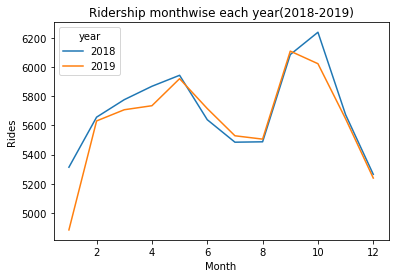

In [81]:
#plotting ridership for each month from 2012-2019
pivot_month_year_ridership=pd.pivot_table(month_rides,index='month',columns='year',values='rides',aggfunc=py.mean) 
pivot_month_year_ridership.plot(xlabel="Month",ylabel="Rides",title="Ridership monthwise each year(2018-2019)")

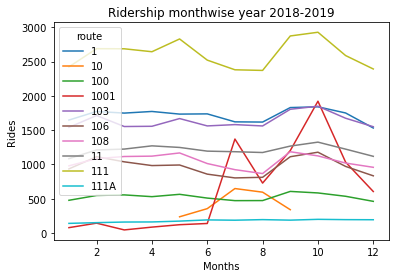

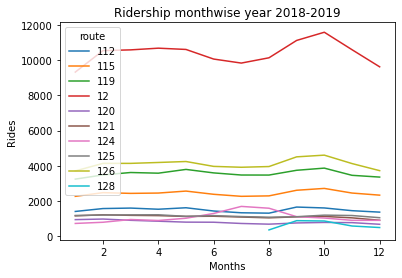

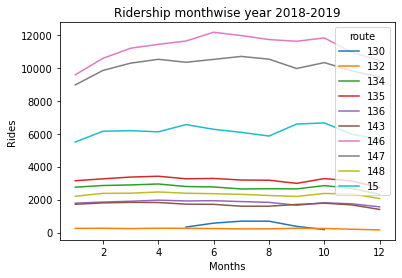

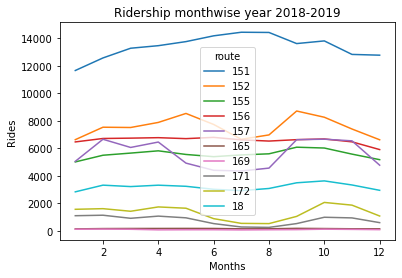

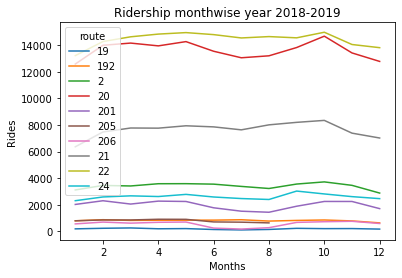

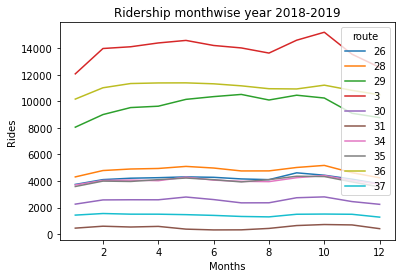

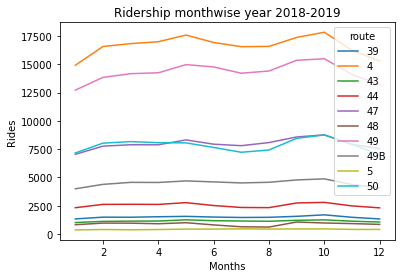

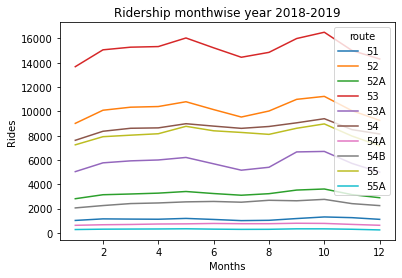

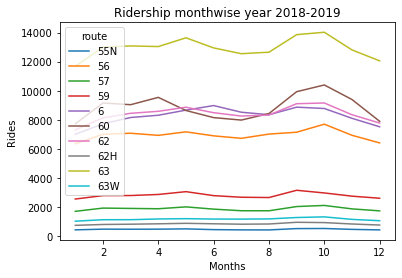

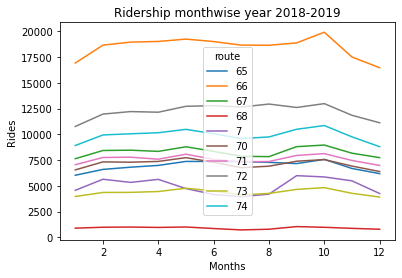

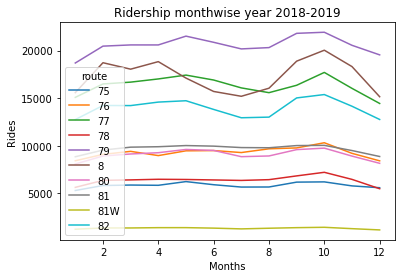

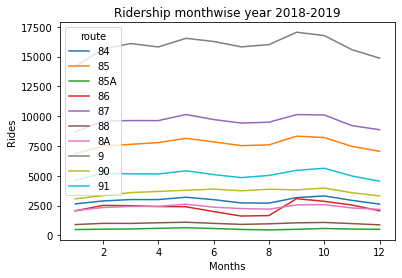

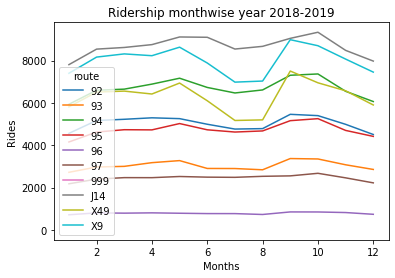

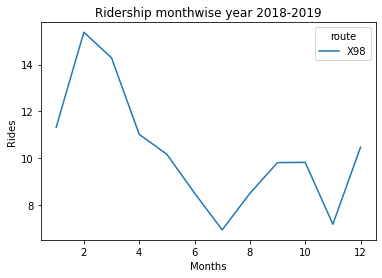

In [82]:
#plotting monthwise ridership for each route
route_set= month_rides['route'].nunique()
pivot_prcp_route_ridership=pd.pivot_table(month_rides,index='month',columns='route',values='rides',aggfunc=py.mean) 


for i in range(0,route_set,10):
    
        pivot_prcp_route_ridership.iloc[:,i:i+10].plot(xlabel="Months",ylabel="Rides",title="Ridership monthwise year 2018-2019")
        
        #pivot_prcp_route_ridership.plot(xlabel="PRCP",ylabel="Rides",title="Ridership monthwise each year(2012-2019)")


<AxesSubplot:title={'center':'Ridership(mean) on Route'}, xlabel='route'>

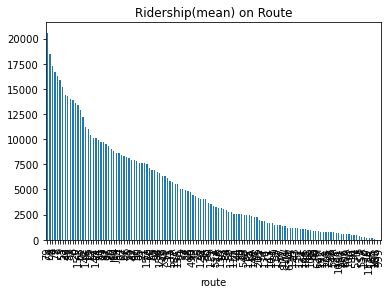

In [85]:
mean_ridership_route = month_rides.groupby(['route'])['rides'].mean().sort_values(ascending = False)
mean_ridership_route.plot(x = 'month', y = 'rides', kind='bar',title = 'Ridership(mean) on Route')

In [90]:
mean_ridership_route.sort_values(ascending=False)

route
79      20578.435616
66      18481.836986
8       17277.475342
4       16644.738356
77      16305.341096
            ...     
111A      178.890411
165       168.674510
169       101.060976
X98        10.412281
999         1.000000
Name: rides, Length: 131, dtype: float64

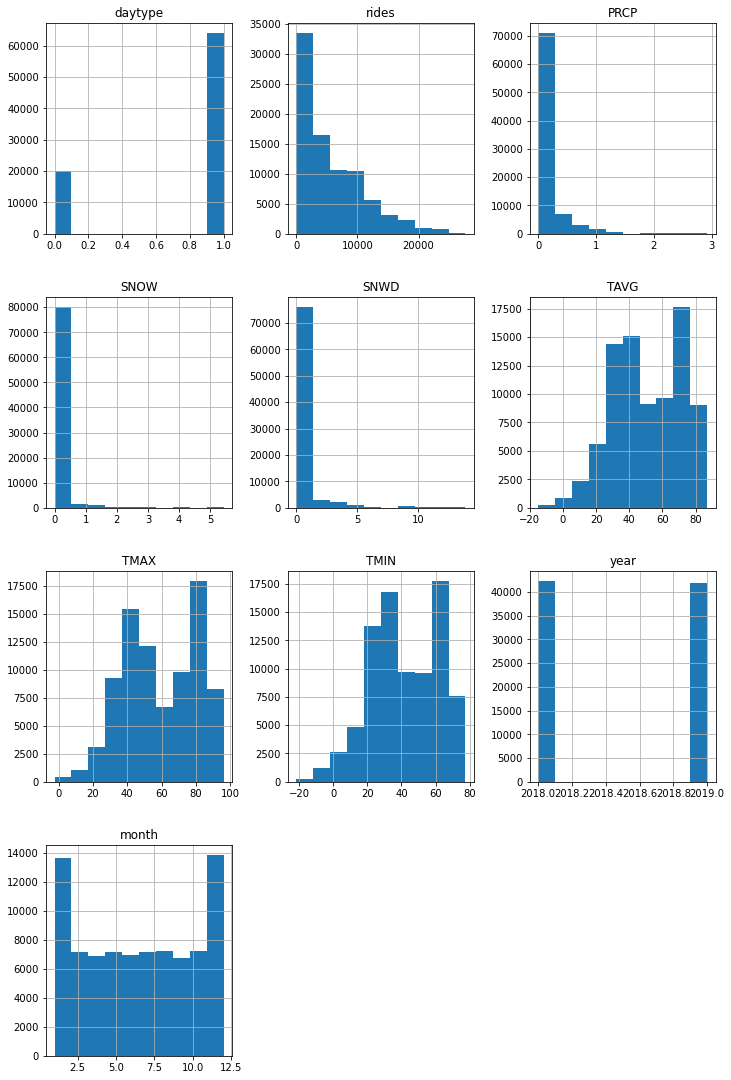

In [91]:
month_rides.hist(figsize=(12,19))
plt.show()

In [92]:
correlation_matrix=bus_ridership_all.corr()
fig=plt.figure(figsize=(15,15))

<Figure size 1080x1080 with 0 Axes>

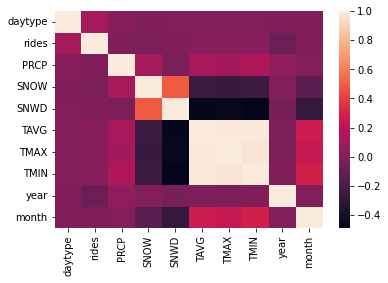

In [93]:
sns.heatmap(correlation_matrix)
plt.show()

### Create a column for route by sorting by most popular route and assign number from 1 to 159 with 1 being least popular and 159 being most popular

In [3]:
clean_data = pd.read_csv('./data/clean_bus_project_data_2012_2019.csv')
pop = clean_data.groupby('route')

In [4]:
print(pop.head())

       route        date  daytype  rides      PRCP  SNOW  SNWD  TAVG  TMAX  \
0          3  2012-01-01      0.0   7661  0.025275   0.0   0.0  36.3  44.6   
1          4  2012-01-01      0.0   9259  0.025275   0.0   0.0  36.3  44.6   
2          5  2012-01-01      0.0    687  0.025275   0.0   0.0  36.3  44.6   
3          6  2012-01-01      0.0   5866  0.025275   0.0   0.0  36.3  44.6   
4          8  2012-01-01      0.0   6963  0.025275   0.0   0.0  36.3  44.6   
...      ...         ...      ...    ...       ...   ...   ...   ...   ...   
197823    95  2016-10-27      1.0   6110  0.843455   0.0   0.0  48.0  51.0   
197833    95  2016-09-27      1.0   6070  0.000467   0.0   0.0  60.0  70.7   
199213   999  2016-10-31      1.0      2  0.007059   0.0   0.0  48.0  59.3   
199737   992  2016-10-30      0.0      1  0.246518   0.0   0.0  54.0  63.2   
285380   999  2018-08-16      1.0      1  0.195935   0.0   0.0  77.0  85.4   

        TMIN  Holiday  
0       28.0      0.0  
1       28.0   

In [6]:
popular_routes = pop['rides'].mean().sort_values(ascending = True)

In [7]:
print(popular_routes.head())

route
992       1.000000
999       1.500000
N201     40.057143
X98      41.016503
165     121.684649
Name: rides, dtype: float64


In [11]:
popular_routes.info()

<class 'pandas.core.series.Series'>
Index: 159 entries, 992 to 79
Series name: rides
Non-Null Count  Dtype  
--------------  -----  
159 non-null    float64
dtypes: float64(1)
memory usage: 2.5+ KB


In [13]:
popular_routes = popular_routes.to_frame(name = 'rides')

In [14]:
popular_routes.reset_index(inplace = True)

In [15]:
print(popular_routes.head(20))

   route       rides
0    992    1.000000
1    999    1.500000
2   N201   40.057143
3    X98   41.016503
4    165  121.684649
5    R39  128.450000
6   111A  171.367986
7    169  182.576777
8     64  188.273469
9     19  264.786175
10   132  268.461669
11   55A  296.845513
12   170  331.713398
13   123  367.040816
14   90N  425.176271
15   122  430.024490
16    69  432.971429
17    17  473.575510
18     5  474.923366
19    31  507.250591


In [17]:
values = popular_routes['route']

In [19]:
dictionary = {}
keys = range(159)
for i in keys:
    dictionary[i] = values[i]
print(dictionary)

{0: '992', 1: '999', 2: 'N201', 3: 'X98', 4: '165', 5: 'R39', 6: '111A', 7: '169', 8: '64', 9: '19', 10: '132', 11: '55A', 12: '170', 13: '123', 14: '90N', 15: '122', 16: '69', 17: '17', 18: '5', 19: '31', 20: '55N', 21: '33', 22: '49A', 23: '1001', 24: '85A', 25: '100', 26: '206', 27: 'R55', 28: '10', 29: '154', 30: '128', 31: '130', 32: '96', 33: '192', 34: '54A', 35: '56A', 36: '120', 37: '205', 38: '62H', 39: '171', 40: '129', 41: '68', 42: '48', 43: '88', 44: '124', 45: '144', 46: '63W', 47: '121', 48: '106', 49: '51', 50: '43', 51: '108', 52: '125', 53: '81W', 54: '172', 55: '37', 56: 'R69', 57: '11', 58: '143', 59: '39', 60: '112', 61: '201', 62: '1', 63: '136', 64: '103', 65: '148', 66: '86', 67: '57', 68: 'R22', 69: '95W', 70: 'R87', 71: '30', 72: '97', 73: '8A', 74: '115', 75: '54B', 76: '24', 77: '134', 78: '44', 79: '93', 80: '84', 81: '2', 82: '59', 83: '18', 84: '111', 85: '135', 86: 'R79', 87: '52A', 88: '95E', 89: '26', 90: '119', 91: '90', 92: 'X28', 93: '35', 94: '73'

In [20]:
dictionary = {'992': 0, '999': 1,'N201': 2, 'X98': 3, '165': 4, 'R39': 5, '111A': 6, '169': 7, '64': 8, '19': 9, '132': 10, '55A': 11, '170': 12, '123': 13, '90N': 14, '122': 15, '69': 16, '17': 17, '5': 18, '31': 19, '55N': 20, '33': 21, '49A': 22, '1001': 23, '85A': 24, '100': 25, '206': 26, 'R55': 27, '10': 28, '154': 29, '128': 30, '130': 31, '96': 32, '192': 33, '54A': 34, '56A': 35, '120': 36, '205': 37, '62H': 38, '171': 39, '129': 40, '68': 41, '48': 42, '88': 43, '124': 44, '144': 45, '63W': 46, '121': 47, '106': 48, '51': 49, '43': 50, '108': 51, '125': 52, '81W': 53, '172': 54, '37': 55, 'R69': 56, '11': 57, '143': 58, '39': 59, '112': 60, '201': 61, '1': 62, '136': 63, '103': 64, '148': 65, '86': 66, '57': 67, 'R22': 68, '95W': 69, 'R87': 70, '30': 71, '97': 72, '8A': 73, '115': 74, '54B': 75, '24': 76, '134': 77, '44': 78, '93': 79, '84': 80, '2': 81, '59': 82, '18': 83, '111': 84, '135': 85, 'R79': 86, '52A': 87, '95E': 88, '26': 89, '119': 90, '90': 91, 'X28': 92, '35': 93, '73': 94, '34': 95, '49B': 96, '95': 97, '126': 98, '28': 99,  '7': 100, '92': 101, '157': 102, '91': 103, '145': 104, '155': 105, 'X49': 106, '75': 107, '53A': 108, '15': 109, 'R63': 110, '78': 111, '65': 112, '156': 113, '94': 114, '70': 115, '56': 116, '71': 117, '152': 118, 'X9': 119, '21': 120, '50': 121, '85': 122, '47': 123, '60': 124, '62': 125, 'J14': 126, '6': 127, 'R95': 128,  '55': 129,  '54': 130, '76': 131, '14': 132, '67': 133, '52': 134, '80': 135, '81': 136, '74': 137, '87': 138, '29': 139, '147': 140, '146': 141, '12': 142, '36': 143, '72': 144, '63': 145, '20': 146, '82': 147, '151': 148, '3': 149, '22': 150, '53': 151, '8': 152, '4': 153, '77': 154, '49': 155, '66': 156, '9': 157, '79': 158}

In [21]:
print(dictionary)

{'992': 0, '999': 1, 'N201': 2, 'X98': 3, '165': 4, 'R39': 5, '111A': 6, '169': 7, '64': 8, '19': 9, '132': 10, '55A': 11, '170': 12, '123': 13, '90N': 14, '122': 15, '69': 16, '17': 17, '5': 18, '31': 19, '55N': 20, '33': 21, '49A': 22, '1001': 23, '85A': 24, '100': 25, '206': 26, 'R55': 27, '10': 28, '154': 29, '128': 30, '130': 31, '96': 32, '192': 33, '54A': 34, '56A': 35, '120': 36, '205': 37, '62H': 38, '171': 39, '129': 40, '68': 41, '48': 42, '88': 43, '124': 44, '144': 45, '63W': 46, '121': 47, '106': 48, '51': 49, '43': 50, '108': 51, '125': 52, '81W': 53, '172': 54, '37': 55, 'R69': 56, '11': 57, '143': 58, '39': 59, '112': 60, '201': 61, '1': 62, '136': 63, '103': 64, '148': 65, '86': 66, '57': 67, 'R22': 68, '95W': 69, 'R87': 70, '30': 71, '97': 72, '8A': 73, '115': 74, '54B': 75, '24': 76, '134': 77, '44': 78, '93': 79, '84': 80, '2': 81, '59': 82, '18': 83, '111': 84, '135': 85, 'R79': 86, '52A': 87, '95E': 88, '26': 89, '119': 90, '90': 91, 'X28': 92, '35': 93, '73': 94

In [23]:
popular_routes['route_coded'] = popular_routes['route'].map(dictionary)

In [24]:
print(popular_routes)

    route         rides  route_coded
0     992      1.000000            0
1     999      1.500000            1
2    N201     40.057143            2
3     X98     41.016503            3
4     165    121.684649            4
..    ...           ...          ...
154    77  18474.997263          154
155    49  18643.237427          155
156    66  20351.489566          156
157     9  21149.002737          157
158    79  23037.097845          158

[159 rows x 3 columns]


In [25]:
data_month = pd.read_csv('./data/month_rides_preprocessed.csv')

In [26]:
print(data_month)

      route  daytype  rides      PRCP      SNOW       SNWD  TAVG       TMAX  \
0        53        0   6793  0.002151  0.013889   2.706522  17.0  26.500000   
1      111A        1    150  0.000000  0.000000   0.000000  35.0  38.800000   
2        94        1   5573  0.000000  0.001266   2.788372   5.0  12.111111   
3         8        0   8116  0.334043  3.534568  13.872727  20.0  23.500000   
4       155        0   4067  0.100333  1.367568   4.015556  27.0  39.100000   
...     ...      ...    ...       ...       ...        ...   ...        ...   
84066   X98        1      1  0.000000  0.000000   0.000000  42.0  52.000000   
84067   X98        1     17  0.000000  0.000000   0.000000  56.0  61.555556   
84068   X98        1     18  0.000000  0.000000   0.000000  37.0  46.666667   
84069   X98        0      1  0.011720  0.000000   0.000000  34.0  46.750000   
84070   X98        1     14  0.359697  0.045455   0.025000  38.0  50.666667   

            TMIN  year  month  
0       2.300000  2

In [27]:
data_month['route_coded'] = data_month['route'].map(dictionary)

In [28]:
print(data_month)

      route  daytype  rides      PRCP      SNOW       SNWD  TAVG       TMAX  \
0        53        0   6793  0.002151  0.013889   2.706522  17.0  26.500000   
1      111A        1    150  0.000000  0.000000   0.000000  35.0  38.800000   
2        94        1   5573  0.000000  0.001266   2.788372   5.0  12.111111   
3         8        0   8116  0.334043  3.534568  13.872727  20.0  23.500000   
4       155        0   4067  0.100333  1.367568   4.015556  27.0  39.100000   
...     ...      ...    ...       ...       ...        ...   ...        ...   
84066   X98        1      1  0.000000  0.000000   0.000000  42.0  52.000000   
84067   X98        1     17  0.000000  0.000000   0.000000  56.0  61.555556   
84068   X98        1     18  0.000000  0.000000   0.000000  37.0  46.666667   
84069   X98        0      1  0.011720  0.000000   0.000000  34.0  46.750000   
84070   X98        1     14  0.359697  0.045455   0.025000  38.0  50.666667   

            TMIN  year  month  route_coded  
0     

In [29]:
data_month.to_csv('month_data_with_route_codes.csv', header=True, index=False)